## HW4 Exploratory Data Analysis

It's time to tie together everything we've learned so far into a more formal exploratory data anlysis. For this homework assignment, we'll use the familiar adult income dataset again. 

Each step should be supported with statistical and visaul analysis, as we walked through in each lab. 

In [94]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

df = pd.read_csv("../Datasets/adult.data", 
                 header=None,
                names=["age", "workclass", "fnlwgt", "education", "education_num", \
             "marital-status", "occupation", "relationship", "race", "sex", \
             "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"])
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Step 1: Describe the dataset
Let us know where this dataset came from, what the columns contain, the dimensions, and any other important information about this dataset. 

This dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult): 

#### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 
    
#### Number of Rows: 
48842

#### Target 
- income: binary categorical values >50K, <=50K. 

#### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - - Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

The following dataframe describes the quantiles and distribution of each numeric column: 

In [95]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Each of the columns appears to be on a very different scale, whith captial_gain and capital_loss being the only reasonbable candidates for scaling. Age and hours_per_week could be binned as needed. I'm unsure what the fnlwgt column represents and that information is not provided in the dataset. 

## Step 2: Data Munging
- Clean up the column names as needed
- Deal with any missing values
- Encode categorical columns
- Bin the income column

### Cleaning up column names

In [96]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Replacing the hyphen in the column labeled "marital-status" for ease of downstream analysis: 

In [97]:
df = df.rename(columns = {'marital-status':'marital_status'})

### Check for Nulls

In [98]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Null values inlcuding np.NaN and Null do not appear in any of the columns. But the data description mentions that the dataset includes nulls. Examining data types for each column: 

In [99]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

The datatype columns are as expected, checking value_counts() for each categorical column to locate null value placeholders such as "?" and " ". 

In [100]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [101]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are three categorical colums that contain ? instead of null. 

In [102]:
df[df.occupation == "?"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [103]:
df[df.native_country == "?"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


Since we cannot locate the question mark as normal, this indicates a possible issue with spacing:  

In [104]:
df[df.occupation == " ?"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


Null values are represented by a question mark with a space in front of the value. Replacing with "unknown" since there is no way to impute this value. 

In [106]:
df["occupation"] = df.occupation.replace(" ?", "unknown")

In [107]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [108]:
df[df.native_country == " ?"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,unknown,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
249,45,Private,153141,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,?,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,unknown,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
393,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,?,>50K


Making the same replacement for native_country and workclass:  

In [109]:
df["native_country"] = df.native_country.replace(" ?", "unknown")

In [111]:
df.workclass = df.workclass.replace(" ?", "unknown")

### Encode Categorical Columns
We can see that we have a lot of categorical columns, so we'll make it easy on ourselves by throwing the entire dataframe into the get_dummies() function, since it will ignore numeric columns automatically. 

#### Encode binary columns first
In order to retain the binary values in a single column, they will be encoded before using the pandas get_dummies() function on the entire dataframe:  

In [112]:
df.income = pd.get_dummies(df.income)

In [113]:
df.sex = pd.get_dummies(df.sex)

Now that the binary variables have been encoded, the entire dataframe can be one-hot-encoded: 

In [114]:
df = pd.get_dummies(df)

In [115]:
df.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
0,39,77516,13,0,2174,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Binning Income Column
Since the income column is already binary, it will not be one-hot-encoded. Instead, the age column will be binned by decade.  

In [116]:
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [117]:
bins = list(range(0,110, 10))

In [118]:
len(bins)

11

In [119]:
labs = ["0_to_9", "10_to_19", "20_to_29", "30_to_39", "40_to_49",
                                     "50_to_59", "60_to_69", "70_to_79", "80_to_90", "90+"]

In [120]:
len(labs)

10

In [121]:
df.age = pd.cut(df.age, 
                bins, 
                labels=labs)

In [122]:
df.age.head()

0    30_to_39
1    40_to_49
2    30_to_39
3    50_to_59
4    20_to_29
Name: age, dtype: category
Categories (10, object): [0_to_9 < 10_to_19 < 20_to_29 < 30_to_39 ... 60_to_69 < 70_to_79 < 80_to_90 < 90+]

## Step 3: Scale as Needed
- Scale/standardize columns as needed
- Tell us why you did/did not choose a particular method for your dataset
- Support your decision with visualizations

Examine numeric columns: 

In [123]:
df.select_dtypes(include=['float', 'int']).head()

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,77516,13,2174,0,40
1,83311,13,0,0,13
2,215646,9,0,0,40
3,234721,7,0,0,40
4,338409,13,0,0,40


The numeric columns, as previously described, contain the following values:  
   
- fnlwgt: continuous.
- education-num: continuous.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous

Capital gain and loss can be scaled for comparison. The distributions are as follows: 

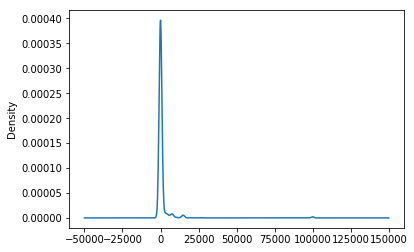

In [124]:
df.capital_gain.plot('density')

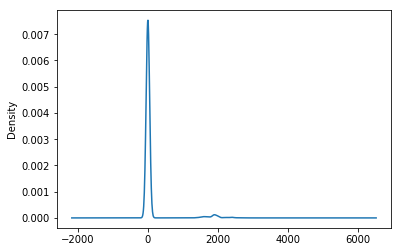

In [125]:
df.capital_loss.plot(kind='density')

Denisty plots of capital_gain and capital_loss show roughly normal distribution, centered around 0, but the range of each column is widely varied. Columns will be min-max scaled to scale the data points to a comparable range: 

In [126]:
# step1: cast our values to floats
df["capital_gain"] = df[['capital_gain']].values.astype(float)
df["capital_loss"] = df[['capital_loss']].values.astype(float)

In [127]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df[["capital_gain", "capital_loss"]] = min_max_scaler.fit_transform(df[["capital_gain", "capital_loss"]])

In [128]:
df.capital_gain.describe()

count    32561.000000
mean         0.010777
std          0.073854
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: capital_gain, dtype: float64

## Step 4: Examine Correlation
- Plot the correlation matrix
- Pull out two variables that show the highest correlation with the income column and calculate their Pearson Correlatoin Coefficient

The correlation matrix between each column is examined below: 

In [129]:
corr = df.corr()
corr

,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
fnlwgt,1.000000,-0.043195,-0.026858,0.000432,-1.025171e-02,-0.018768,0.009463,-0.007525,-0.002828,0.005031,...,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501,0.004506
education_num,-0.043195,1.000000,-0.012280,0.122630,7.992296e-02,0.148123,-0.335154,0.060518,0.097941,-0.015117,...,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234,0.027184
sex,-0.026858,-0.012280,1.000000,-0.048480,-4.556735e-02,-0.229309,0.215980,-0.000989,0.037966,-0.001405,...,0.015791,0.003504,0.004663,-0.003088,0.014012,0.012744,0.006993,1.205333e-03,-0.006753,-0.014695
capital_gain,0.000432,0.122630,-0.048480,1.000000,-3.161506e-02,0.078409,-0.223329,-0.005768,-0.007007,-0.002140,...,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193,0.013326
capital_loss,-0.010252,0.079923,-0.045567,-0.031615,1.000000e+00,0.054256,-0.150526,0.010798,0.014668,-0.003177,...,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804,0.010375
hours_per_week,-0.018768,0.148123,-0.229309,0.078409,5.425636e-02,1.000000,-0.229689,0.013293,0.011576,-0.014262,...,-0.008964,0.001264,0.007938,-0.004988,0.009537,-0.006006,0.002446,-1.137917e-02,0.007408,0.011760
income,0.009463,-0.335154,0.215980,-0.223329,-1.505263e-01,-0.229689,1.000000,-0.059372,-0.033091,0.008259,...,0.018791,-0.000413,0.004737,-0.014020,0.004078,0.007660,-0.034470,1.764856e-02,-0.006959,-0.003038
workclass_ Federal-gov,-0.007525,0.060518,-0.000989,-0.005768,1.079841e-02,0.013293,-0.059372,1.000000,-0.045682,-0.002556,...,0.014259,-0.003347,-0.004983,-0.006903,-0.004099,-0.004212,0.015441,9.868459e-05,-0.003865,-0.000258
workclass_ Local-gov,-0.002828,0.097941,0.037966,-0.007007,1.466771e-02,0.011576,-0.033091,-0.045682,1.000000,-0.003843,...,-0.000695,-0.005033,-0.013007,-0.004048,-0.006164,-0.001148,0.033196,-3.611051e-03,-0.000161,-0.010836
workclass_ Never-worked,0.005031,-0.015117,-0.001405,-0.002140,-3.177054e-03,-0.014262,0.008259,-0.002556,-0.003843,1.000000,...,-0.000869,-0.000282,-0.000728,-0.000581,-0.000345,-0.000354,0.005000,-6.658596e-04,-0.000325,-0.001980


The correlation matrix represented as a heat map: 

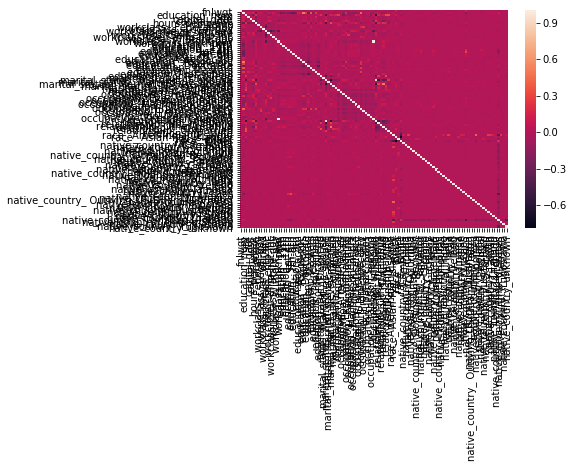

In [130]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The assumptions of correlation are that:  
- each variable should be continuous
- linear relationship
- roughly normal distribution. 

The overcrowded and minimally correlated heatmap above, combined with our knowledge about the continuous columns in our dataset, indicates that we should subset our dataframe to only relevant columns. 

In [162]:
testing_df = df[["hours_per_week", 
                 "capital_gain", 
                 "capital_loss", 
                 "fnlwgt",
                 "income"]]

Plotting the correlation heatmap for continuous variables: 

In [163]:
test_corr = testing_df.corr()
test_corr

,hours_per_week,capital_gain,capital_loss,fnlwgt,income
hours_per_week,1.000000,0.078409,0.054256,-0.018768,-0.229689
capital_gain,0.078409,1.000000,-0.031615,0.000432,-0.223329
capital_loss,0.054256,-0.031615,1.000000,-0.010252,-0.150526
fnlwgt,-0.018768,0.000432,-0.010252,1.000000,0.009463
income,-0.229689,-0.223329,-0.150526,0.009463,1.000000


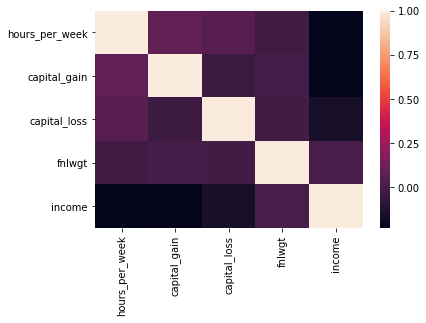

In [164]:
import seaborn as sns
sns.heatmap(test_corr, 
            xticklabels=test_corr.columns.values,
            yticklabels=test_corr.columns.values)

The only variable not showing a complete lack of correlation with income is fnlwgt. The fnlwgt and hours_per_week columns will be used for testing. 

In [170]:
testing_df = df[["fnlwgt", "hours_per_week"]]

## Step 5: Test your predictors for normality
- For each of your top 2 columns, test the normality of the distribution
- Visualize and report test statistics

Density plots of the testing columns: 

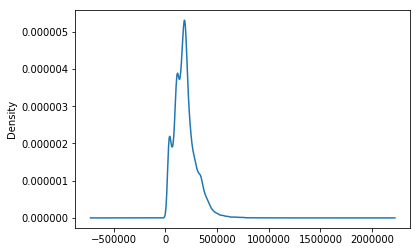

In [165]:
df.fnlwgt.plot(kind='density')

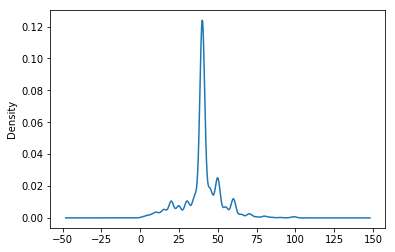

In [166]:
df.hours_per_week.plot(kind='density')

Density plots of the testing columns indicate that neither distribution is centered around 0 with a standard deviation of 1. Hours_per_week may be multi-modal. 

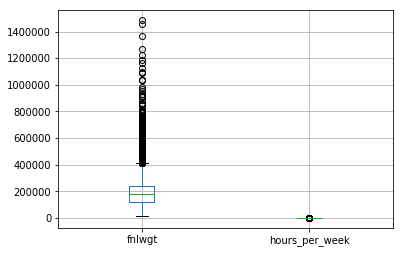

In [172]:
testing_df.boxplot()

Because these columns are on such a different scale, they need to be plotted spearately to examine the distributions: 

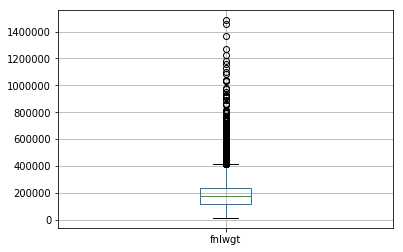

In [182]:
testing_df[["fnlwgt"]].boxplot()

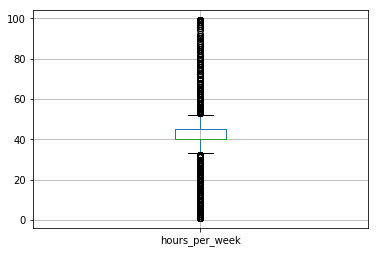

In [183]:
testing_df[["hours_per_week"]].boxplot()

Both columns have heavy concentrations of outliers, with only a small range of data points located in the inner quartile range. 

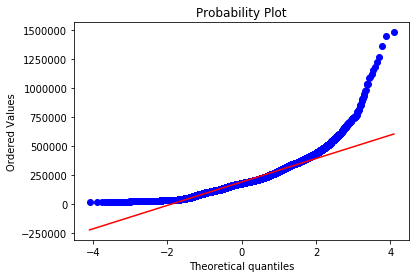

In [168]:
import scipy.stats as stats

stats.probplot(df.fnlwgt, dist="norm", plot=plt)
plt.show()

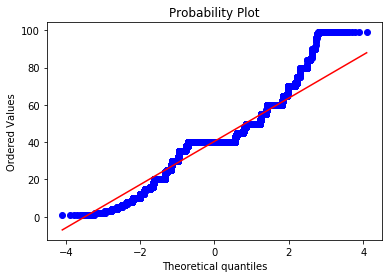

In [169]:
stats.probplot(df.hours_per_week, dist="norm", plot=plt)
plt.show()

QQ plots of the distributions further indicated the the distributions of each column are not normally distributed and confirms the skewness and heavy tailed distirbutions seen above. 

In [200]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(testing_df.fnlwgt)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9223421216011047, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


/Users/summerrae/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [175]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(testing_df.hours_per_week)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8851855397224426, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


/Users/summerrae/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Both columns had p-values of 0 with high Wilkes statistic, inidicating a non-Gaussian distribution. 

In [176]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(testing_df.fnlwgt)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 10662.513694511363, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [177]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(testing_df.hours_per_week)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 2508.9184404706616, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


K^2 results also show non-normality with p-values of 0 and high K^2 stats. 

In [178]:
from scipy.stats import anderson

# anderson test
result = anderson(df.fnlwgt)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 386.78015772128856
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [179]:
from scipy.stats import anderson

# anderson test
result = anderson(df.hours_per_week)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 1763.9255099085494
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


Anderson-Darling showed non-normality by rejecting the null hypothesis at all significance levels. All tests indicate that neither column comes from a normal distribution. 

## Step 6: Test for Outliers
- Find and report the number of outliers found
- Visualize and describe any patterns or lack therof
- Remove and re-examine the effect on the normality of your data

The boxplots above indicated that each column contains many outliers. DBSCAN clustering will be used to calculate the number of outlier data points:  

In [187]:
from sklearn.cluster import DBSCAN

# import DBSCAN model
outlier_detection = DBSCAN()

# fit and predict cluster labels for our column
testing_df["clusters"] = outlier_detection.fit_predict(testing_df)

/Users/summerrae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [189]:
testing_df.clusters.unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72])

The data separated into many different clusters, further supporting the non-normalcy of the datset. Outliers were deteced: 

In [196]:
num_clusters = len(testing_df[testing_df.clusters == -1])
pct_cluster = int(num_clusters/len(testing_df) * 100)
                   
"There are {} outliers. That is {}% of the dataframe".format(num_clusters, pct_cluster)

'There are 32156 outliers. That is 98% of the dataframe'

As 98% of the data is considered an outlier according to DBSCAN, each normality test failed, and the over-abundance of categorical vs continuous varibles indicated that this dataset is not a good candidate for linear regression. Recommeding logistic regression instead. 